Import Library and Dataset


In [3]:
# Main packages

!pip install dexplot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import dexplot as dxp
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import pickle 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ImportError: cannot import name 'DistanceMetric' from 'sklearn.metrics' (C:\Users\sidde\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [ ]:
df=pd.read_csv("heart_2020_cleaned.csv")

Data Overview

In [3]:
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [4]:
df.dtypes.value_counts()

object     14
float64     4
dtype: int64

Features: 14 Categorical and 4 Floats

In [5]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [6]:
df.shape

(319795, 18)

In [7]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [8]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

# **Visualization Float Data**

In [9]:
#Visualization on Categorical data

mask = df.dtypes == np.object
categ_columns = df.columns[mask]
categ_columns

C:\Users\Admin\AppData\Local\Temp/ipykernel_13644/401475081.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = df.dtypes == np.object


Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [10]:
categ_features = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
categ_features

['Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

<AxesSubplot:xlabel='AlcoholDrinking', ylabel='count'>

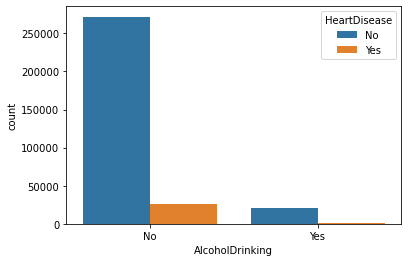

In [11]:
sns.countplot(x='AlcoholDrinking',hue='HeartDisease',data=df)


<AxesSubplot:xlabel='Stroke', ylabel='count'>

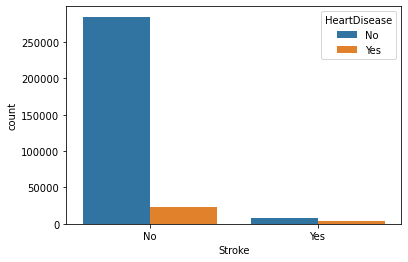

In [12]:
sns.countplot(x='Stroke',hue='HeartDisease',data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

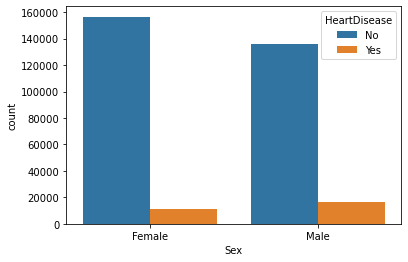

In [13]:
sns.countplot(x='Sex',hue='HeartDisease',data=df)

<AxesSubplot:xlabel='AgeCategory', ylabel='count'>

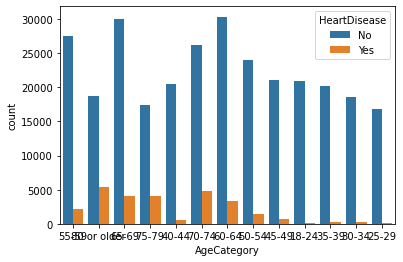

In [14]:
sns.countplot(x='AgeCategory',hue='HeartDisease',data=df)

<AxesSubplot:xlabel='Diabetic', ylabel='count'>

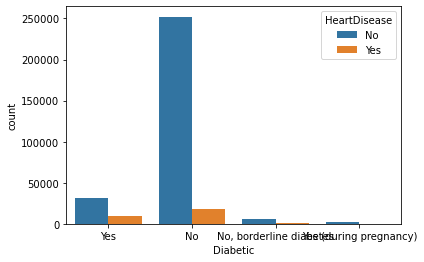

In [15]:
sns.countplot(x='Diabetic',hue='HeartDisease',data=df)

<AxesSubplot:xlabel='KidneyDisease', ylabel='count'>

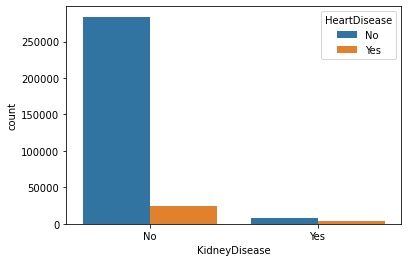

In [16]:
sns.countplot(x='KidneyDisease',hue='HeartDisease',data=df)

<AxesSubplot:xlabel='Asthma', ylabel='count'>

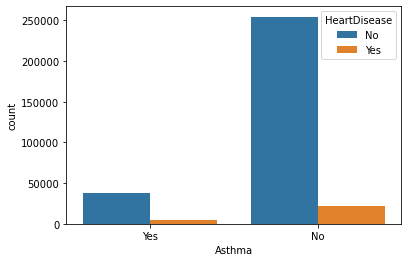

In [17]:
sns.countplot(x='Asthma',hue='HeartDisease',data=df)

<AxesSubplot:xlabel='GenHealth', ylabel='count'>

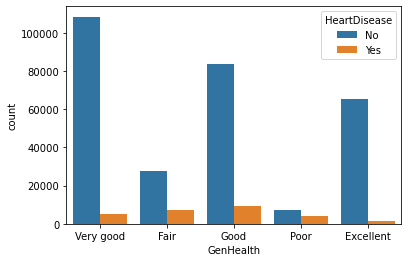

In [18]:
sns.countplot(x='GenHealth',hue='HeartDisease',data=df)

<AxesSubplot:xlabel='PhysicalActivity', ylabel='count'>

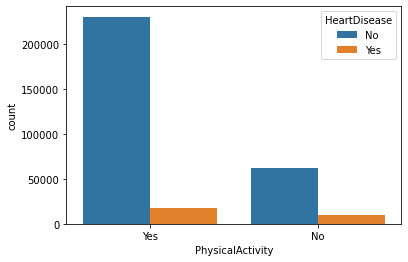

In [19]:
sns.countplot(x='PhysicalActivity',hue='HeartDisease',data=df)

<AxesSubplot:xlabel='Race', ylabel='count'>

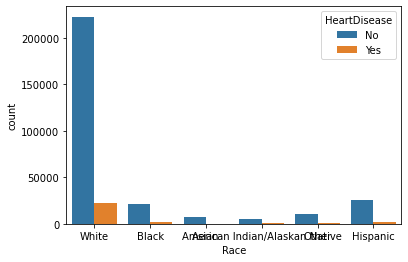

In [20]:
sns.countplot(x='Race',hue='HeartDisease',data=df)

# **Visualization Float Data**

In [21]:
mask = df.dtypes == np.float
float_columns = df.columns[mask]
float_columns

C:\Users\Admin\AppData\Local\Temp/ipykernel_13644/1950056334.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = df.dtypes == np.float


Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')

In [22]:
df["HeartDisease"].value_counts(normalize=True)

No     0.914405
Yes    0.085595
Name: HeartDisease, dtype: float64

In [23]:
df["HeartDisease"].value_counts(normalize=True)

No     0.914405
Yes    0.085595
Name: HeartDisease, dtype: float64

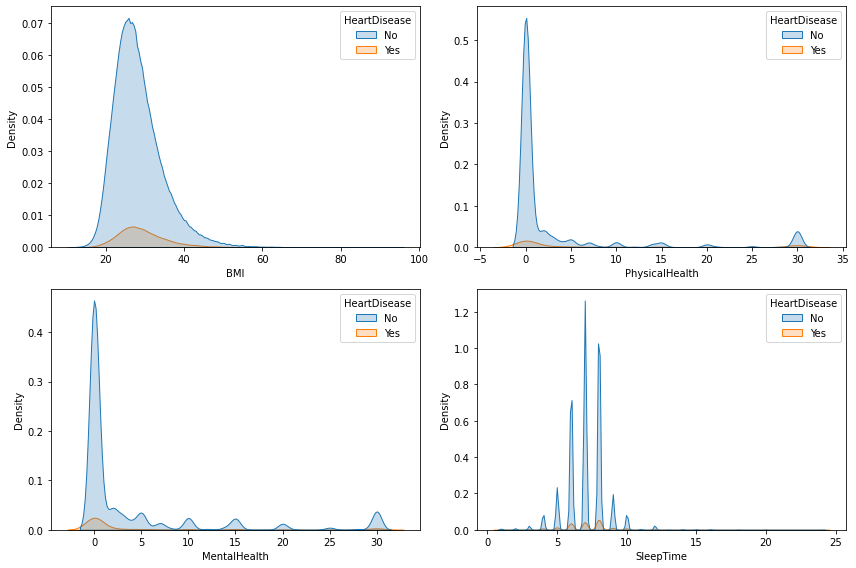

In [24]:
nrows, ncols = 2, 2
combine_features = df[float_columns]

fig = plt.figure(figsize=(12,8))    

for position, name_feature in zip(range(1,18),combine_features):
    axes = fig.add_subplot(nrows, ncols, position)
    sns.kdeplot(ax=axes,data=df[float_columns],x = df[name_feature] , hue=df["HeartDisease"],fill=True,bw_adjust=.8)
    
fig.tight_layout()
plt.show()



# **Detection of outlier**

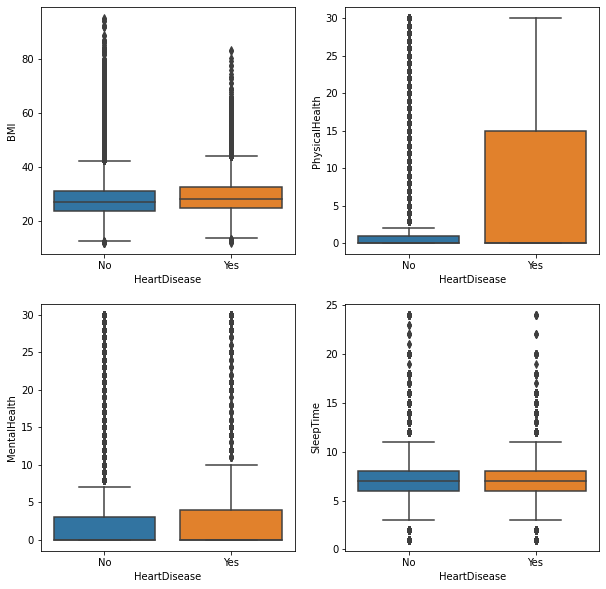

In [25]:
i = 1
plt.figure(figsize = (10,10))
for feature in float_columns:
    plt.subplot(2,2,i)
    sns.boxplot(x = 'HeartDisease', y = feature, data = df)
    i +=1

In [26]:
df.groupby('HeartDisease').median().T

HeartDisease,No,Yes
BMI,27.26,28.34
PhysicalHealth,0.00,0.00
MentalHealth,0.00,0.00
SleepTime,7.00,7.00


In [27]:
whiskers = pd.DataFrame(columns = ['LowerW', 'UpperW'])

for i in df[float_columns]:
    median = np.median(df[i])
    upper_quartile = np.percentile(df[i], 75)
    lower_quartile = np.percentile(df[i], 25)

    iqr = upper_quartile - lower_quartile
    upper_whisker = df[i][df[i]<=upper_quartile+1.5*iqr].max()
    lower_whisker = df[i][df[i]>=lower_quartile-1.5*iqr].min()

    
    whiskers.loc[i] = [lower_whisker]+ [upper_whisker]
whiskers

,LowerW,UpperW
BMI,12.97,42.5
PhysicalHealth,0.00,5.0
MentalHealth,0.00,7.0
SleepTime,3.00,11.0


In [28]:
df_out = df.loc[(df["BMI"]<=whiskers.loc["BMI","UpperW"]) & 
                (df["BMI"]>=whiskers.loc["BMI","LowerW"]) & 
                (df["SleepTime"]<=whiskers.loc["SleepTime","UpperW"]) &
                (df["SleepTime"]>=whiskers.loc["SleepTime","LowerW"])]
df_out=df_out.reset_index()
df_out[float_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,305113.0,27.664319,5.209102,12.97,23.81,27.12,30.9,42.5
PhysicalHealth,305113.0,3.165129,7.692373,0.00,0.00,0.00,1.0,30.0
MentalHealth,305113.0,3.747651,7.781831,0.00,0.00,0.00,3.0,30.0
SleepTime,305113.0,7.068489,1.229315,3.00,6.00,7.00,8.0,11.0


# **Data Skewness Check**

In [29]:
skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = df_out[float_columns].skew()

# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
PhysicalHealth,2.728974
MentalHealth,2.404157


In [30]:
df_log = df_out.copy()

for col in skew_cols.index.values:
    df_log[col] = df_out[col].apply(np.log1p)
    
skew_vals_aft = df_log[float_columns].skew()
skew_cols_aft = (skew_vals_aft
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols_aft

,Skew
PhysicalHealth,1.664062
MentalHealth,1.238801


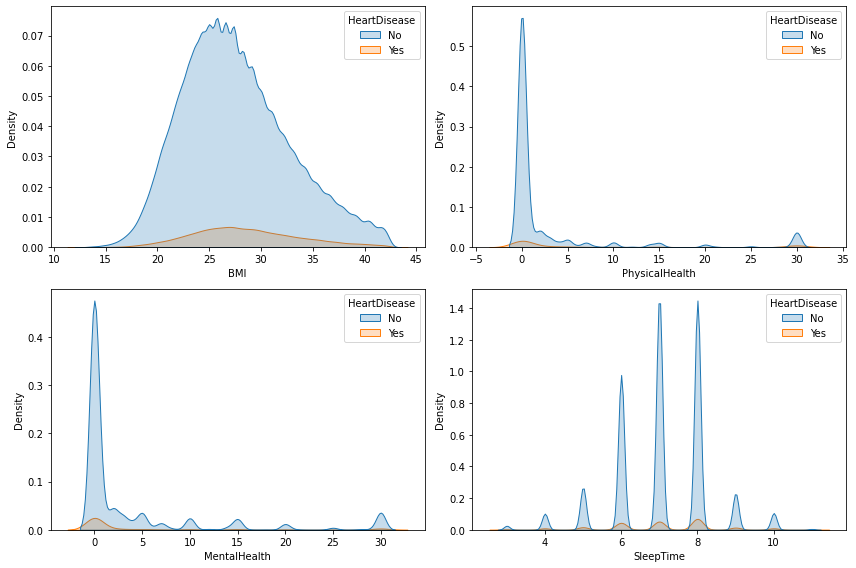

In [31]:
nrows, ncols = 2, 2
combine_features = df_out[float_columns]

fig = plt.figure(figsize=(12,8))    

for position, name_feature in zip(range(1,18),combine_features):
    axes = fig.add_subplot(nrows, ncols, position)
    sns.kdeplot(ax=axes,data=df_out[float_columns],x = df_out[name_feature] , hue=df_out["HeartDisease"],fill=True,bw_adjust=.8)
    
fig.tight_layout()
plt.show()

# **Encoding Feature**

In [32]:
df_log[categ_columns].describe().T

,count,unique,top,freq
HeartDisease,305113,2,No,279644
Smoking,305113,2,No,179817
AlcoholDrinking,305113,2,No,284038
Stroke,305113,2,No,293968
DiffWalking,305113,2,No,266222
Sex,305113,2,Female,158778
AgeCategory,305113,13,65-69,32656
Race,305113,6,White,235208
Diabetic,305113,4,No,259706
PhysicalActivity,305113,2,Yes,239623


In [33]:
categ_list = list(df_log[categ_columns])
for i in categ_list:
    print(i)
    print(df_log[i].unique())

HeartDisease
['No' 'Yes']
Smoking
['Yes' 'No']
AlcoholDrinking
['No' 'Yes']
Stroke
['No' 'Yes']
DiffWalking
['No' 'Yes']
Sex
['Female' 'Male']
AgeCategory
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity
['Yes' 'No']
GenHealth
['Very good' 'Fair' 'Good' 'Excellent' 'Poor']
Asthma
['Yes' 'No']
KidneyDisease
['No' 'Yes']
SkinCancer
['Yes' 'No']


In [34]:
non_binary_list= list()
for i in categ_list:
    if df_log[i].nunique()>2:
        non_binary_list.append(i)
        
print(non_binary_list)

['AgeCategory', 'Race', 'Diabetic', 'GenHealth']


In [35]:
binary_list= list()
for i in categ_list:
    if df_log[i].nunique()<=2:
        binary_list.append(i)
        
print(binary_list)

['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']


Encode- One hot Encoder

In [36]:
df_one_hot = df_log[binary_list]
df_one_hot = pd.get_dummies(df_one_hot, drop_first=True)
df_float = df_log[float_columns].copy()

In [37]:
non_binary_list.remove("Race")
non_binary_list

['AgeCategory', 'Diabetic', 'GenHealth']

Ordinal Encoder

In [38]:
df_ord=df_log[non_binary_list].copy()
enc = OrdinalEncoder(categories="auto")
enc.fit(df_ord)
_ord = enc.fit_transform(df_ord)
df_ord = pd. DataFrame(_ord, columns=['AgeCat', 'HealthCat','DiabeticCat'])
df_ord = pd.concat([df_ord, df_log[non_binary_list]], axis = 1)
df_ord.head()

,AgeCat,HealthCat,DiabeticCat,AgeCategory,Diabetic,GenHealth
0,7.0,2.0,4.0,55-59,Yes,Very good
1,12.0,0.0,4.0,80 or older,No,Very good
2,9.0,2.0,1.0,65-69,Yes,Fair
3,11.0,0.0,2.0,75-79,No,Good
4,4.0,0.0,4.0,40-44,No,Very good


In [39]:
enc.categories_

[array(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
        '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'],
       dtype=object),
 array(['No', 'No, borderline diabetes', 'Yes', 'Yes (during pregnancy)'],
       dtype=object),
 array(['Excellent', 'Fair', 'Good', 'Poor', 'Very good'], dtype=object)]

In [40]:
enc_dict = {'Excellent':0, 'Very good':1,'Good':2,'Fair':3, 'Poor':4}
df_ord['HealthCat'] = df_log['GenHealth'].map(enc_dict)

enc_dict2 = {'No':0, 'Yes (during pregnancy)':1,'No, borderline diabetes':2,'Yes':3}
df_ord['DiabeticCat'] = df_log['Diabetic'].map(enc_dict2)
enc_dict3 = {'White':0, 'Black':1, 'Asian':2, 'American Indian/Alaskan Native':3, 'Other':4,
 'Hispanic':5}
df_ord['Race']=df_log['Race'].map(enc_dict3)

df_ord.head(10)

,AgeCat,HealthCat,DiabeticCat,AgeCategory,Diabetic,GenHealth,Race
0,7.0,1,3,55-59,Yes,Very good,0
1,12.0,1,0,80 or older,No,Very good,0
2,9.0,3,3,65-69,Yes,Fair,0
3,11.0,2,0,75-79,No,Good,0
4,4.0,1,0,40-44,No,Very good,0
5,10.0,3,0,70-74,No,Fair,0
6,12.0,2,3,80 or older,Yes,Good,0
7,12.0,3,2,80 or older,"No, borderline diabetes",Fair,0
8,9.0,2,0,65-69,No,Good,0
9,7.0,1,0,55-59,No,Very good,0


In [41]:
df2 = pd.concat([df_float,df_one_hot,df_ord[['HealthCat', 'AgeCat','DiabeticCat','Race']]],axis = 1)
df2.columns

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime',
       'HeartDisease_Yes', 'Smoking_Yes', 'AlcoholDrinking_Yes', 'Stroke_Yes',
       'DiffWalking_Yes', 'Sex_Male', 'PhysicalActivity_Yes', 'Asthma_Yes',
       'KidneyDisease_Yes', 'SkinCancer_Yes', 'HealthCat', 'AgeCat',
       'DiabeticCat', 'Race'],
      dtype='object')

# **Under Sampling**

In [42]:
target = 'HeartDisease_Yes'
featurs = [x for x in df2.columns if x != target]
df2[target].value_counts(normalize=True)

0    0.916526
1    0.083474
Name: HeartDisease_Yes, dtype: float64

In [43]:
# Get the split indexes
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=50)

train_idx, test_idx = next(sss.split(df2[featurs], df2[target]))

# Create the data sets
X_train = df2.loc[train_idx, featurs]
y_train = df2.loc[train_idx, target]

X_test = df2.loc[test_idx, featurs]
y_test = df2.loc[test_idx, target]

In [44]:
undersample = RandomUnderSampler(sampling_strategy='majority', random_state = 50)
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

In [45]:
print("After undersampling: ", Counter(y_train_under))


After undersampling:  Counter({0: 20375, 1: 20375})


In [46]:
print("Test sample: ", Counter(y_test))

Test sample:  Counter({0: 55929, 1: 5094})


# **Prediction of Heart Disease using KNN & Random Forest**

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [48]:
# from sklearn.linear_model import LogisticRegression

# lr_clf = LogisticRegression(solver='liblinear')
# lr_clf.fit(X_train, y_train)

# print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
# print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

In [49]:
# test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
# train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

# results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
#                           columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
# results_df

In [50]:
# from sklearn.neighbors import KNeighborsClassifier

# knn_clf = KNeighborsClassifier()
# knn_clf.fit(X_train, y_train)

# print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
# print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

# test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
# train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

# results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
#                           columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
# results_df = results_df.append(results_df_2, ignore_index=True)
# results_df

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

# results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
#                           columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
# results_df = results_df.append(results_df_2, ignore_index=True)
# results_df

Train Result:
Accuracy Score: 99.66%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.996569      0.997152  0.996616       0.996860       0.996618
recall          0.999750      0.962209  0.996616       0.980979       0.996616
f1-score        0.998157      0.979369  0.996616       0.988763       0.996589
support    223715.000000  20375.000000  0.996616  244090.000000  244090.000000
_______________________________________________
Confusion Matrix: 
 [[223659     56]
 [   770  19605]]

Test Result:
Accuracy Score: 90.88%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.924695     0.363374  0.908772      0.644034      0.877837
recall         0.980296     0.123479  0.908772      0.551888      0.908772
f1-score       0.951684     0.184322  0.908772      0.568003 

# **Model Results**

In [55]:
user_input=input("Enter the values one by one")
user_input=user_input.split(",")


for i in range(len(user_input)):
    # convert each item to int type
    user_input[i] = float(user_input[i])

user_input=np.array(user_input)
user_input=user_input.reshape(1,-1)
#user_input=scal.transform(user_input)
RF_Y_pred=rf_clf.predict(user_input)
if(RF_Y_pred[0]==0):
 print("You have no chances of getting a heart disease!")
else:
  print("Warning!!!You have chances to get a heart disease!")

Enter the values one by one28.87,1.0,0.0,0.0,6.0,0.0,1.0,0.0,11.0,2.0,0.0,0.0,0.0,0.0,0.0,0,0
You have no chances of getting a heart disease!


In [56]:
featurs

['BMI',
 'PhysicalHealth',
 'MentalHealth',
 'SleepTime',
 'Smoking_Yes',
 'AlcoholDrinking_Yes',
 'Stroke_Yes',
 'DiffWalking_Yes',
 'Sex_Male',
 'PhysicalActivity_Yes',
 'Asthma_Yes',
 'KidneyDisease_Yes',
 'SkinCancer_Yes',
 'HealthCat',
 'AgeCat',
 'DiabeticCat',
 'Race']

In [58]:
import pickle as pkl
pkl.dump(rf_clf,open("Mod_final_model.p","wb"))